# Model Comparison
In the following notebook, all trained models are evaluated.

In [8]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import cv2

from dataloader import RoofDataSet, show_centroids
from dataloader import Transforms
from modeltraining import Resnet18, model_resnet18, test_model

In [6]:
# Loading data
path = '/Users/pauli/Documents/Studium/Master/3. Semester Auslandssemester DTU/Deep Learning/Final Project/Otovo/data_updated/meta_data.hdf'
dataset = RoofDataSet(path, transform=Transforms(new_size=(256,256)))
imp_path = dataset.image_paths +  "/"+dataset.id[0]+"-b15-otovowms.jpeg"
image = cv2.imread(imp_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preparing test data set
len_test_set = int(0.1*len(dataset))
len_train_set = len(dataset) - len_test_set

train_dataset , test_dataset  = torch.utils.data.random_split(dataset, [len_train_set, len_test_set])
print("The length of Test set is {}".format(len_test_set))


# shuffle and batch the datasets
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Resnet 18
### First model
epochs = 50
batchsize = 300
dataloader moad = 'constant'

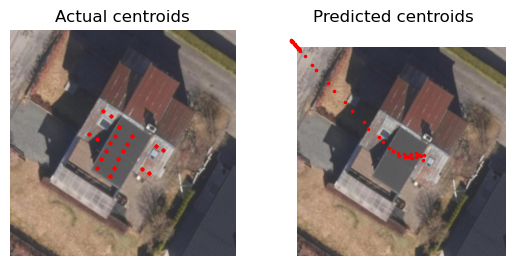

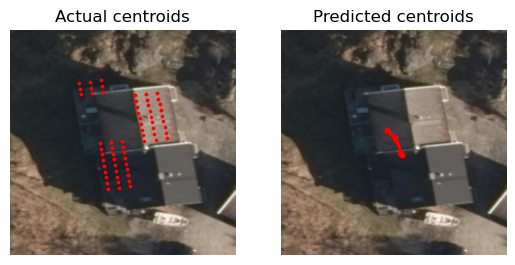

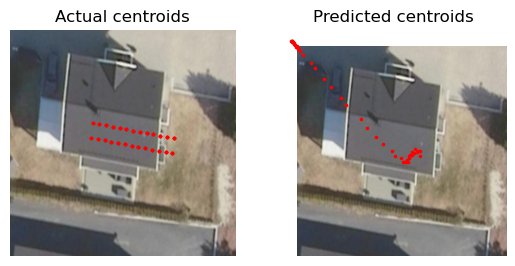

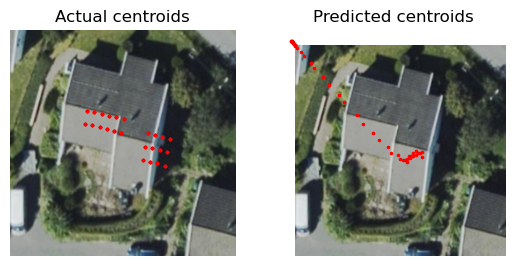

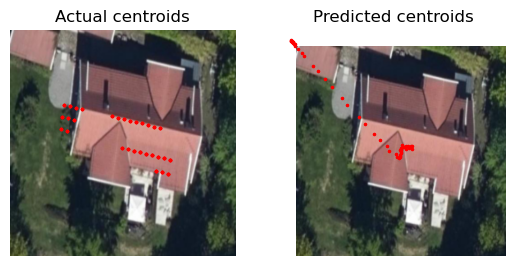

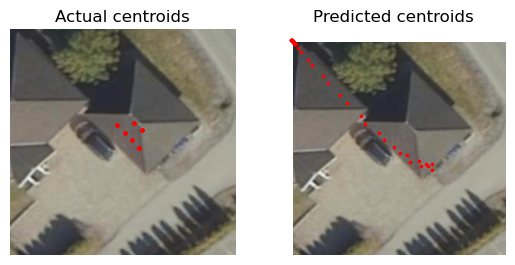

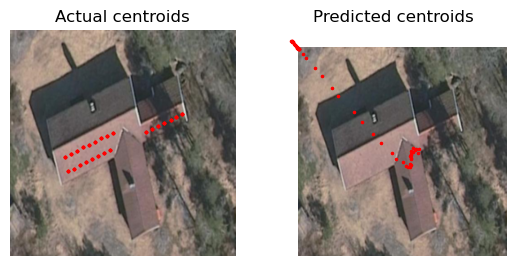

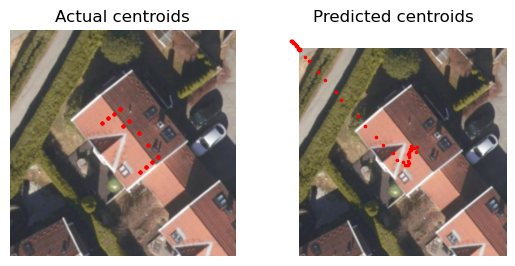

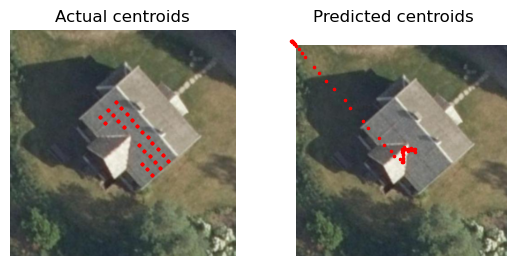

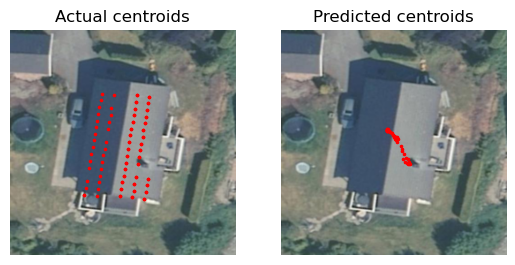

[tensor([[[ 1.3721e+02,  1.5392e+02],
          [ 1.3100e+02,  1.5429e+02],
          [ 1.3240e+02,  1.5088e+02],
          [ 1.3176e+02,  1.4896e+02],
          [ 1.3422e+02,  1.4515e+02],
          [ 1.2871e+02,  1.4463e+02],
          [ 1.3500e+02,  1.4059e+02],
          [ 1.3026e+02,  1.3940e+02],
          [ 1.3359e+02,  1.3631e+02],
          [ 1.3272e+02,  1.3443e+02],
          [ 1.3396e+02,  1.3095e+02],
          [ 1.3067e+02,  1.2985e+02],
          [ 1.3297e+02,  1.2441e+02],
          [ 1.2884e+02,  1.2232e+02],
          [ 1.2609e+02,  1.1640e+02],
          [ 1.2246e+02,  1.1185e+02],
          [ 1.1609e+02,  1.0389e+02],
          [ 1.0914e+02,  9.9400e+01],
          [ 9.9717e+01,  8.6666e+01],
          [ 9.1268e+01,  8.1076e+01],
          [ 7.7099e+01,  6.6646e+01],
          [ 6.6458e+01,  5.7709e+01],
          [ 5.3006e+01,  4.4755e+01],
          [ 4.3563e+01,  3.7507e+01],
          [ 2.7403e+01,  2.2152e+01],
          [ 2.0871e+01,  1.7022e+01],
          [ 

In [14]:
Path ="./trained_models/resnet_27_11_22.pt"
model = torch.load(Path, map_location=torch.device('cpu'))
test_model(model, test_loader, 10)

### Centroids maped to (-100, -100)
The next model maps all unnecessary centroid positions of the regression vector to (-100, -100) instead of (0,0).
epochs = 50
batchsize = 68
dataloader moad = 'constant' (-100, -100)

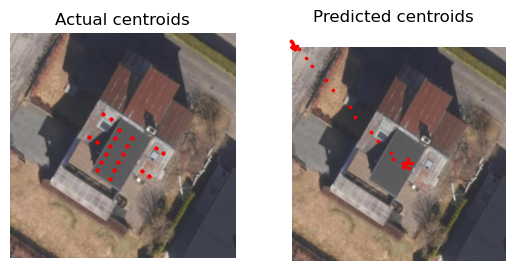

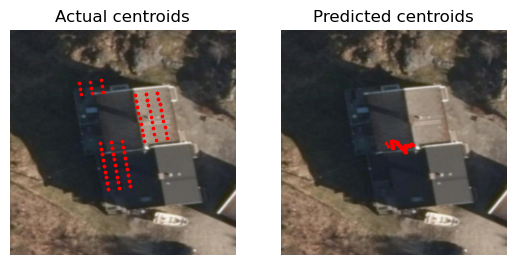

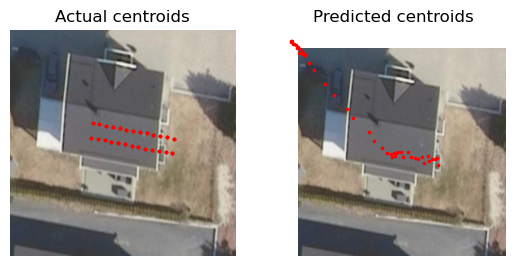

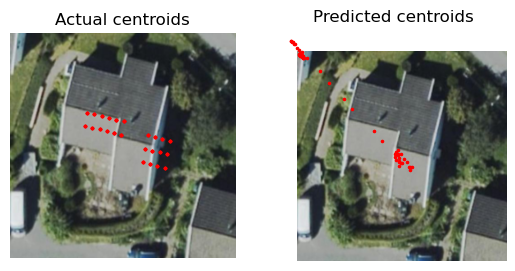

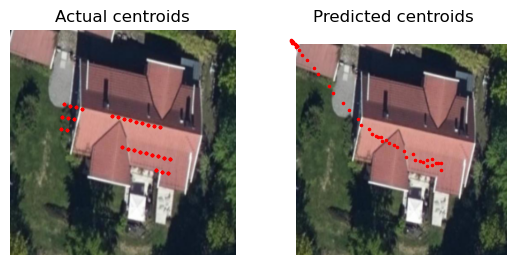

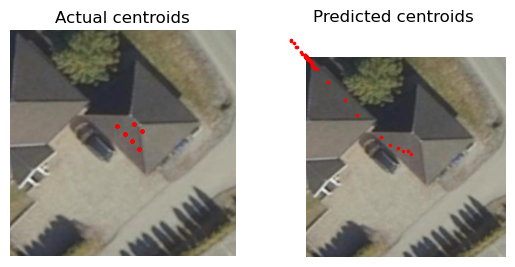

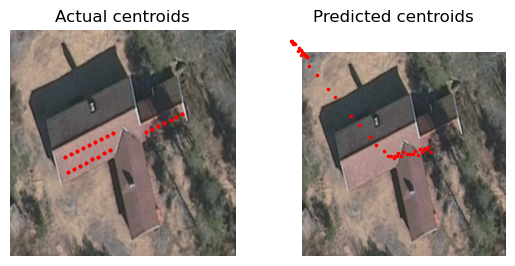

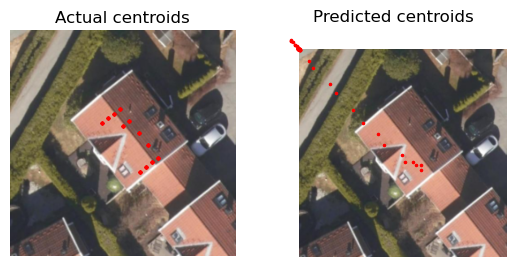

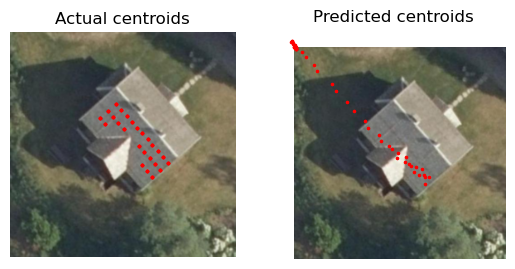

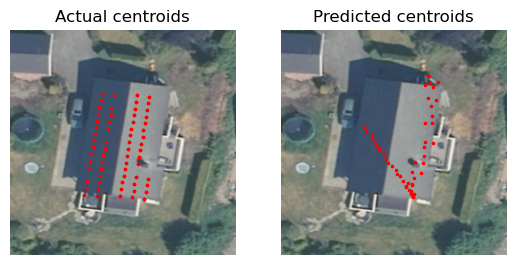

[tensor([[[ 1.4392e+02,  1.3929e+02],
          [ 1.3791e+02,  1.4278e+02],
          [ 1.3817e+02,  1.3922e+02],
          [ 1.3628e+02,  1.3812e+02],
          [ 1.3752e+02,  1.3407e+02],
          [ 1.3341e+02,  1.3748e+02],
          [ 1.4084e+02,  1.3337e+02],
          [ 1.3817e+02,  1.3738e+02],
          [ 1.4240e+02,  1.3498e+02],
          [ 1.4139e+02,  1.3437e+02],
          [ 1.4293e+02,  1.3161e+02],
          [ 1.3799e+02,  1.3182e+02],
          [ 1.3378e+02,  1.1974e+02],
          [ 1.2574e+02,  1.1740e+02],
          [ 1.1184e+02,  1.0238e+02],
          [ 1.0060e+02,  9.3806e+01],
          [ 8.2490e+01,  7.5077e+01],
          [ 7.1249e+01,  6.8809e+01],
          [ 5.0327e+01,  4.7536e+01],
          [ 3.9061e+01,  3.9944e+01],
          [ 2.1191e+01,  2.3369e+01],
          [ 1.2005e+01,  1.5966e+01],
          [ 1.8965e+00,  6.9623e+00],
          [-1.9883e+00,  4.4965e+00],
          [-7.4008e+00, -1.5700e+00],
          [-8.0067e+00, -1.7326e+00],
          [-

In [15]:
Path ="./trained_models/resnet18_constant_minus100_27_11_22.pt"
model = torch.load(Path, map_location=torch.device('cpu'))
test_model(model, test_loader, 10)

### Centroids wrapped
epochs = 50
batchsize = 68
dataloader moad = 'wrap'

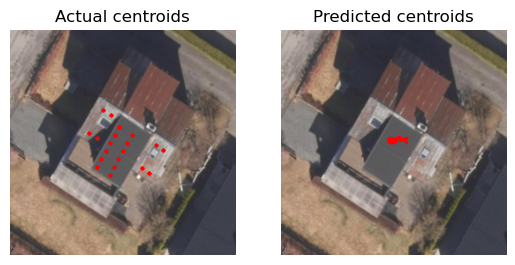

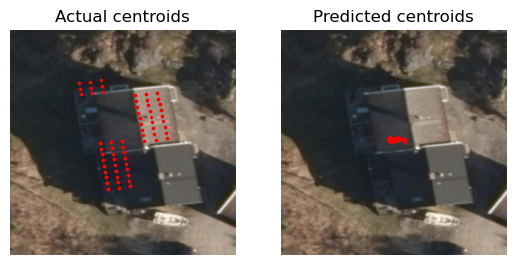

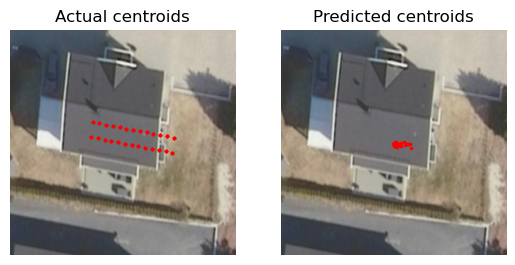

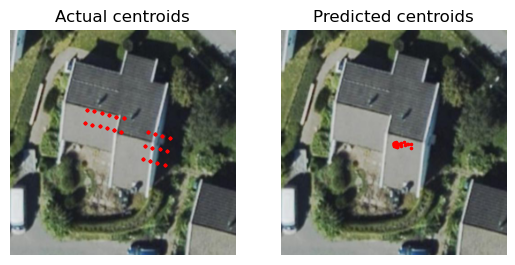

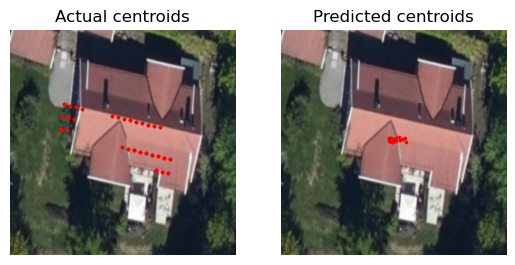

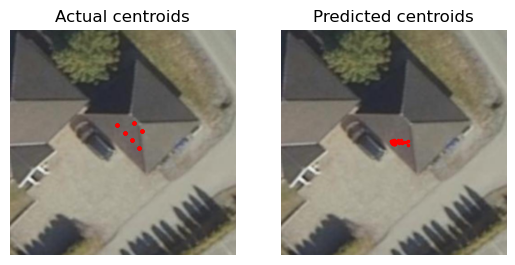

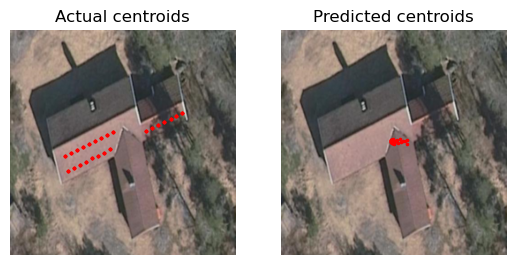

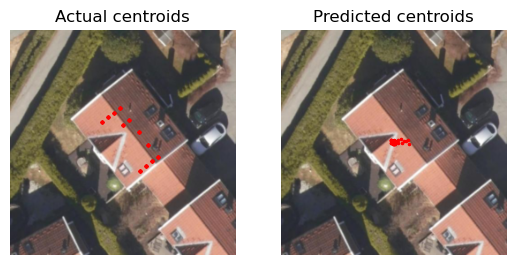

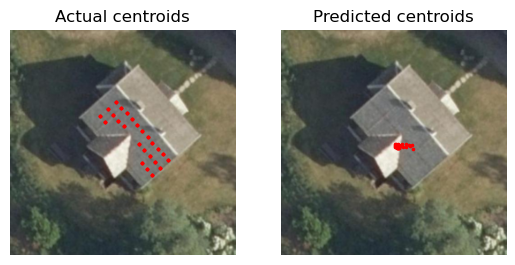

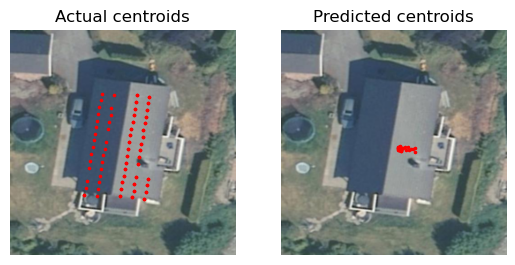

[tensor([[[127.6801, 142.1248],
          [123.1585, 141.4568],
          [124.0685, 139.3203],
          [123.6811, 137.5492],
          [125.4675, 134.9444],
          [121.9292, 134.0215],
          [125.9724, 131.0284],
          [122.6465, 130.2977],
          [124.5451, 128.3753],
          [123.9363, 127.2630],
          [125.0896, 125.9833],
          [122.6996, 125.4251],
          [126.4932, 124.4181],
          [123.4467, 124.0307],
          [124.6740, 123.4198],
          [124.3149, 122.9385],
          [125.9339, 123.1738],
          [123.1505, 122.5911],
          [126.1140, 122.8002],
          [123.3535, 122.6670],
          [125.5057, 123.5412],
          [124.4271, 123.3373],
          [125.6119, 123.6513],
          [123.2899, 123.5312],
          [126.8392, 125.1942],
          [124.1472, 124.9853],
          [125.7098, 125.0146],
          [124.3276, 125.0236],
          [126.4043, 125.6045],
          [123.5301, 125.2322],
          [126.7214, 125.9982],
        

In [17]:
Path ="./trained_models/resnet18_wrap_27_11_22.pt"
model = torch.load(Path, map_location=torch.device('cpu'))
test_model(model, test_loader, 10)